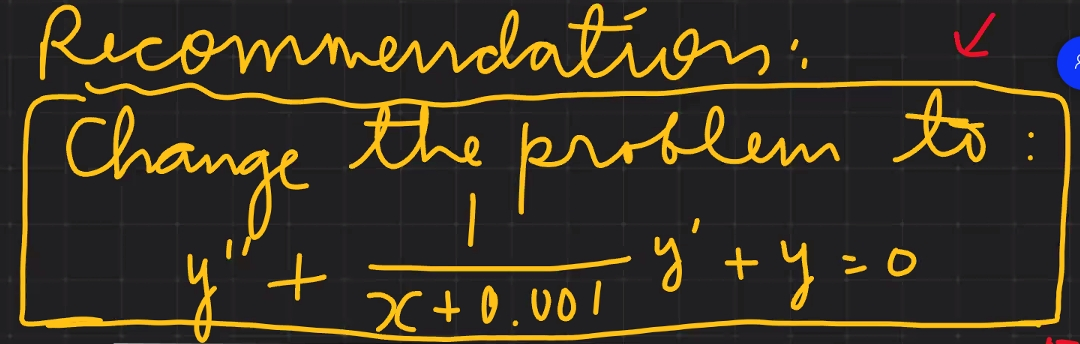

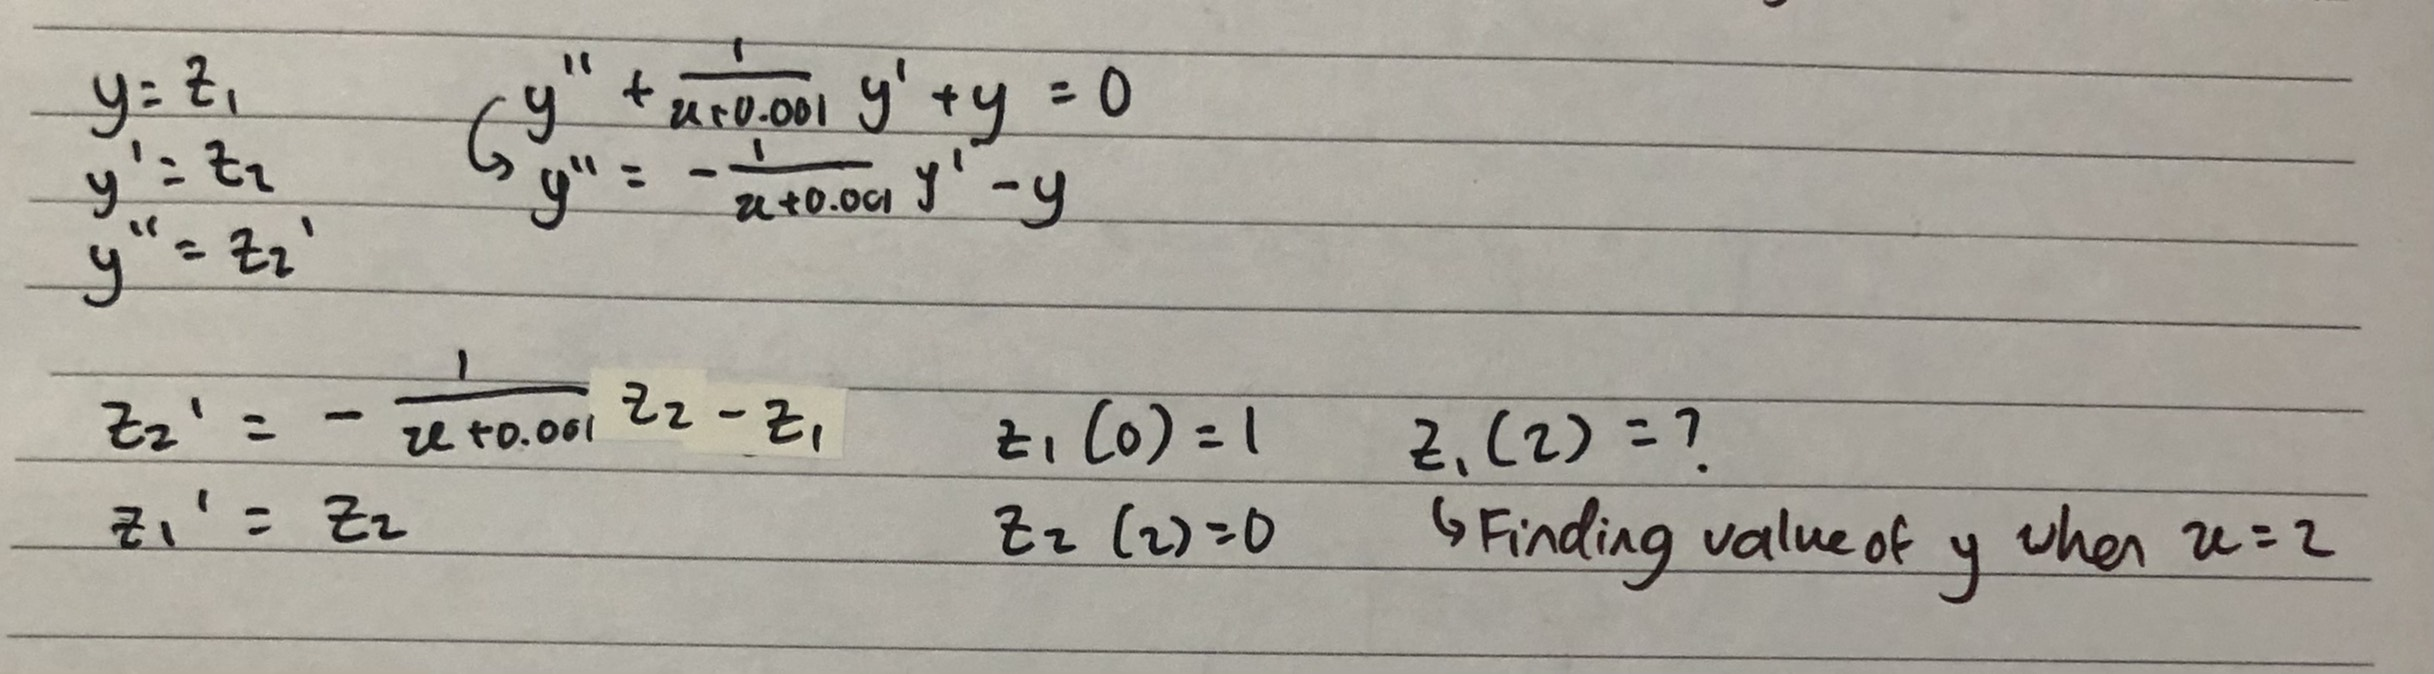

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def euler_vector(f, x, y0):
    n = np.shape(x)[0]
    # Checking the input data
    ns = np.shape(y0)[0]
    
    # Setting up a two column matrix to store the ans
    y = np.zeros((n, ns)) # First col will be all points, second col will be shooting angles
    dx = x[1] - x[0]
    
    # Set first row to be initial starting point and initial shooting angle
    y[0, :] = y0
    for i in range(n-1):
        y[i+1,:] = y[i,:] + dx * f(x[i], y[i,:])
    return y

def interpolate(theta1, theta2, y1, y2, y3):
    theta3 = theta1 + (y3-y1) / (y2-y1) * (theta2-theta1)
    return theta3

def problem(x, y):
    z1 = y[0]
    z2 = y[1]
    dz1 = z2
    dz2 = (- 1 / (x + 0.001)) * z2 - z1
    dz = np.array([dz1, dz2])
    return dz


x = np.linspace(0.0, 2.0, 20)

# First shooting
theta1 = 2.0
y = euler_vector(problem, x, [1.0, theta1]) # Pass the function inside euler
y1 = y[-1, 1] # Get the last shooting angle because we already know the end shooting angle (array slicing)

# Second shooting
theta2 = 3.0
y = euler_vector(problem, x, [1.0, theta2])
y2 = y[-1, 1]

# Third shooting
theta3 = interpolate(theta1, theta2, y1, y2, 0.0) # 0.0 because it's our target shooting angle
y = euler_vector(problem, x, [1.0, theta3])


[ 1.          1.00908417  0.05085983  0.03066138  0.01995086  0.01245951
  0.0066155   0.00180001 -0.00228746 -0.00581174 -0.00887067 -0.01152568
 -0.01381714 -0.01577277 -0.01741246 -0.01875134 -0.01980171 -0.02057434
 -0.02107929 -0.02132659]


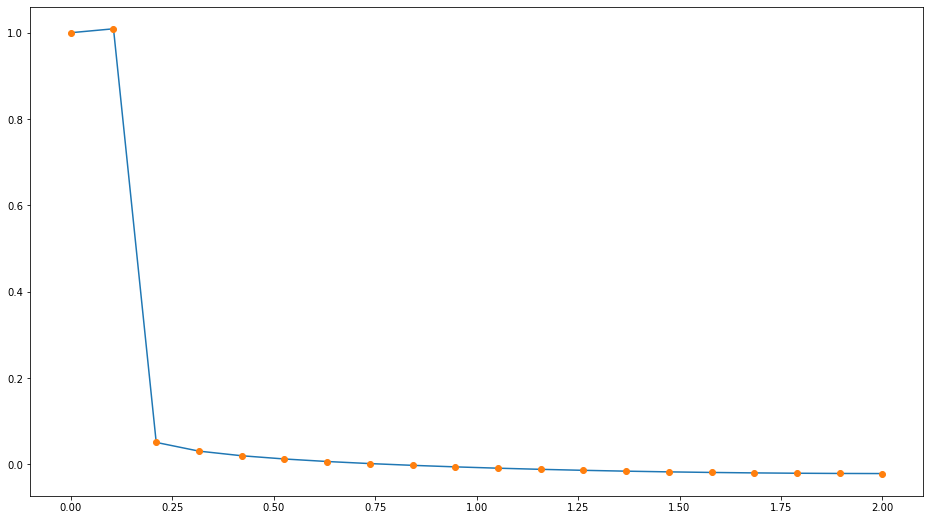

In [20]:
# Plotting the graph
fig = plt.figure(1, figsize=(16,9));plt.clf()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y[:,0])
ax.plot(x, y[:,0], 'o')
print(y[:,0])